In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns
import numpy as np
sns.set()

In [62]:
from vinecopulaslab.utils.universe import UniverseDownloader
from vinecopulaslab.pairselection import TraditionalSelection, ExtendedSelection, GeometricSelection

In [4]:
sp500 = UniverseDownloader(cache=True).historic_sp500_data()

In [52]:
%%time
pairs = TraditionalSelection().select_pairs(sp500)

CPU times: user 3min 39s, sys: 2min 22s, total: 6min 1s
Wall time: 6min 1s


In [53]:
pairs.head(10)

TARGET_STOCK
A           [WAT, PKI, TMO]
AAL         [LUV, DAL, UAL]
AAP        [GPC, AZO, ORLY]
AAPL    [AMZN, GOOGL, GOOG]
ABBV          [PKI, A, TMO]
ABC        [HSIC, MCK, CAH]
ABMD          [A, TMO, PKI]
ABT           [PKI, A, TMO]
ACN           [V, MA, MSFT]
ADBE          [MA, V, MSFT]
dtype: object

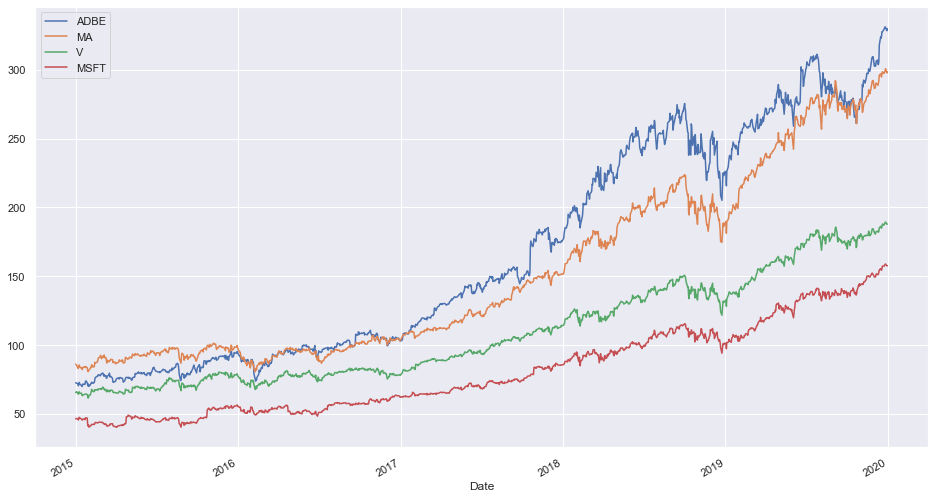

In [54]:
sample_pairs = TraditionalSelection().convert_pairs_series_to_list(pairs)[9]
sp500[sample_pairs].plot(figsize=(16,9));

In [48]:
%%time
pairs_e = ExtendedSelection().select_pairs(sp500)

CPU times: user 17min 27s, sys: 16min 33s, total: 34min 1s
Wall time: 34min 27s


In [51]:
pairs_e.head(10)

TARGET_STOCK
A              [A, WAT, PKI, TMO]
AAL          [AAL, LUV, DAL, UAL]
AAP         [AAP, GPC, AZO, ORLY]
AAPL    [AAPL, AMZN, GOOGL, GOOG]
ABBV          [ABBV, PKI, A, TMO]
ABC         [ABC, HSIC, MCK, CAH]
ABMD          [ABMD, A, TMO, PKI]
ABT            [ABT, PKI, A, TMO]
ACN            [ACN, V, MA, MSFT]
ADBE          [ADBE, MA, V, MSFT]
dtype: object

In [71]:
GS = GeometricSelection()

In [75]:
pairs_g = GS.select_pairs(sp500.iloc[:,:55])

In [76]:
pairs_g.head(10)

TARGET_STOCK
A             [A, BA, ALXN, AFL]
AAL         [AAL, ARE, ALB, ADP]
AAP         [AAP, BA, AAPL, ADP]
AAPL      [AAPL, AON, ABMD, AVY]
ABBV    [ABBV, AAPL, AMAT, ADSK]
ABC       [ABC, AMZN, ADM, ABBV]
ABMD      [ABMD, AON, AVY, ATVI]
ABT      [ABT, AAPL, AMAT, AKAM]
ACN       [ACN, ALGN, AMAT, ADI]
ADBE      [ADBE, APTV, AMP, APD]
dtype: object

In [ ]:
#This seems like a mistake. Will double check

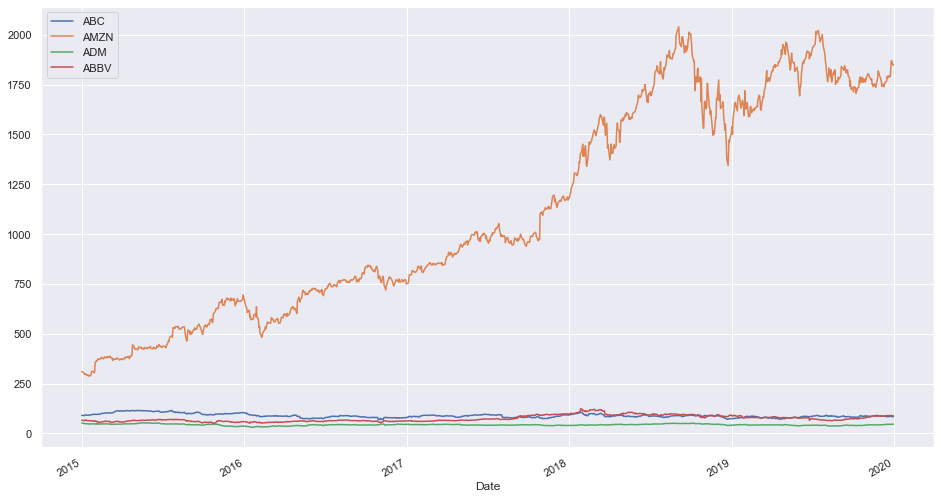

In [87]:
sp500[pairs_g.tolist()[5]].plot(figsize=(16,9));

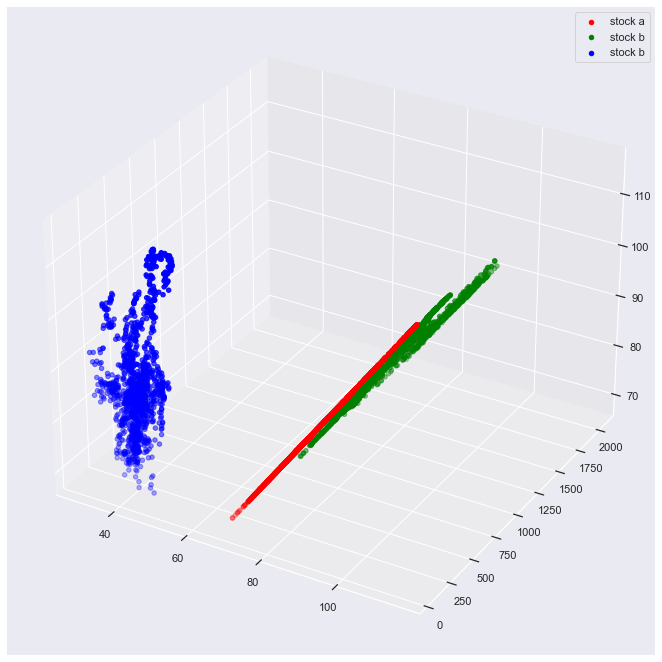

In [88]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

values = sp500[pairs_g.tolist()[5]].values
y = np.linspace(0,1)
x = np.linspace(0,1)
z = np.linspace(0,1)
#ax.scatter(x,y,z, label="grp_n")  # this way you can control color/marker/size of each group freely
ax.scatter(values[:,0],values[:,0],values[:,0], label="stock a",c="red")  # if you want to do everything in one line, lol
ax.scatter(values[:,0],values[:,1],values[:,0], label="stock b",c="green")  # if you want to do everything in one line, lol
ax.scatter(values[:,2],values[:,0],values[:,0], label="stock b",c="blue")  # if you want to do everything in one line, lol
#ax.scatter(values, label="grp_name")  # if you want to do everything in one line, lol

ax.legend()